# Get Image Information

Will take some old photo with visible visual defects and analyse it.

## Sources

### Images source
[boredpanda.com](https://www.boredpanda.com/first-color-photos-vintage-old-autochrome-lumiere-auguste-louis)

### Image analysis online help:
- [DZone Introduction: A Little Bit About Pixel](https://dzone.com/articles/image-data-analysis-using-numpy-amp-opencv)
- [DataCarpentry: Image Processing with Python](https://datacarpentry.org/image-processing/aio/index.html)
- [Composite Histogram](https://towardsdatascience.com/histograms-in-image-processing-with-skimage-python-be5938962935)

## Libraries and Imports

In [116]:
import requests
import os.path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import skimage.io

## Download the Image

The image will be saved as *sample_image.ext*@, extension auto-detected.

In [117]:
imageUrl = "https://static.boredpanda.com/blog/wp-content/uploads/2017/06/first-color-photos-vintage-old-autochrome-lumiere-auguste-louis-593e7a310c38f__880.jpg"
extension = os.path.splitext(imageUrl)[1]
imagePath = "./sample_image" + extension
response = requests.get(imageUrl)
file = open(imagePath, "wb")
file.write(response.content)
file.close()

print(f"Saved the image {imagePath}")

Saved the image ./sample_image.jpg


## Render the Image

[[75 64 70]
 [68 57 63]
 [61 50 56]
 ...
 [68 51 59]
 [68 51 61]
 [68 51 61]]


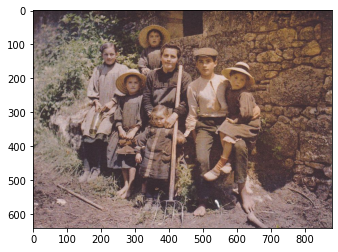

In [118]:
img = mpimg.imread(imagePath)
print(img[0])
imgplot = plt.imshow(img)

## Gather the image information

In [119]:
print('Dimensions: {}x{}'.format(img.shape[1], img.shape[0]))
print('Color: {}'.format(img.ndim > 1))
print('Shape of the image: {}'.format(img.shape))
print('Max RGB value: {}'.format(img.max()))
print('Min RGB value: {}'.format(img.min()))

Dimensions: 880x641
Color: True
Shape of the image: (641, 880, 3)
Max RGB value: 255
Min RGB value: 0


## Use of Scikit-Image

Scikit-Image is a popular and powerful scientific image library for Python. It
can provide additional information about the image.

## Black and White Histogram

When we look at the histogram we can see that the dynamic range is narrow and is
grouped in closer to the center of the image. This is characteristic of older
and poor-quality images.

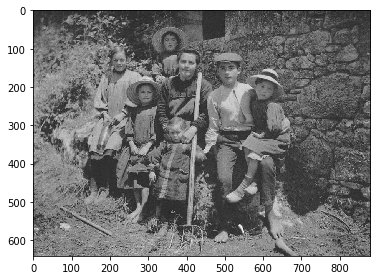

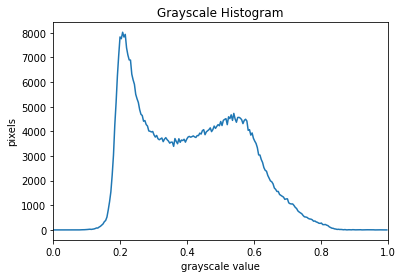

In [120]:
# Build the histogram.
image = skimage.io.imread(imagePath, as_gray=True)
skimage.io.imshow(image)
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))

# Show the histogram.
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here
plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

## Color Histogram.

You can see that the red channel is shifted against green and blue. This results
in a red hue shift, characteristic of the old photos. This was caused by the
chemicals composing the colors degrading over time.

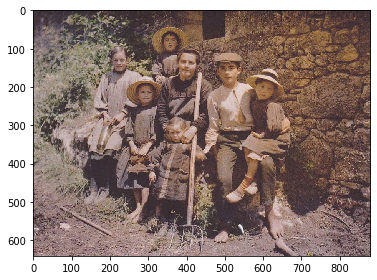

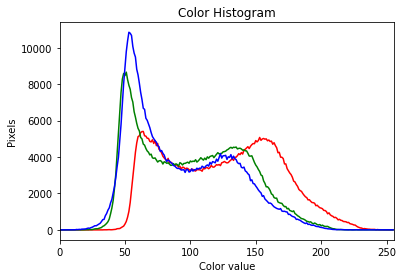

In [121]:
image = skimage.io.imread(imagePath)
skimage.io.imshow(image)
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)
plt.figure()
plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixels")
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)
plt.show()

## Composite Histogram

On the composite histogram, one can see non-overlapping gaps in the data of the
channels. These are usually caused by the software performing dynamic range
correction. But photo editing software usually creates the overlapping gaps.
Thus, the gaps in this photo could be unintended, like a product of a
quantization or compression algorithm.

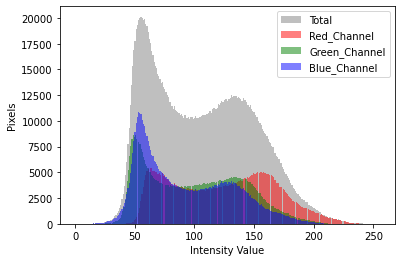

In [122]:
image = skimage.io.imread(imagePath)

plt.hist(image.ravel(), bins = 256, color = 'grey', alpha = 0.5)
plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'green', alpha = 0.5)
plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'blue', alpha = 0.5)
plt.xlabel('Intensity Value')
plt.ylabel('Pixels')
plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()